# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [443]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [444]:
m=2
c=2

In [445]:
np.random.seed(42)
x = np.linspace(0, 50, 100)
y=m*x+c
noise = np.random.normal(0, 5, size=len(x))
Y= y + noise


In [446]:
X = x.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [447]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [448]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [449]:
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
Y_train_pred = model.predict(X_train_scaled)
Y_test_pred = model.predict(x_test_scaled)

Coefficient: 29.336677730810703
Intercept: 52.67128203654996


In [450]:
print("train")
print("MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("MSE:", mean_squared_error(Y_train, Y_train_pred))
print("R2:", r2_score(Y_train, Y_train_pred))
print("test")
print("MAE:", mean_absolute_error(Y_test, Y_test_pred))
print("MSE:", mean_squared_error(Y_test, Y_test_pred))
print("R2:", r2_score(Y_test, Y_test_pred))

train
MAE: 3.7205908178615585
MSE: 21.58673262633426
R2: 0.975531554789763
test
MAE: 3.006561737491563
MSE: 15.551056057254453
R2: 0.9817963850564473


train visual


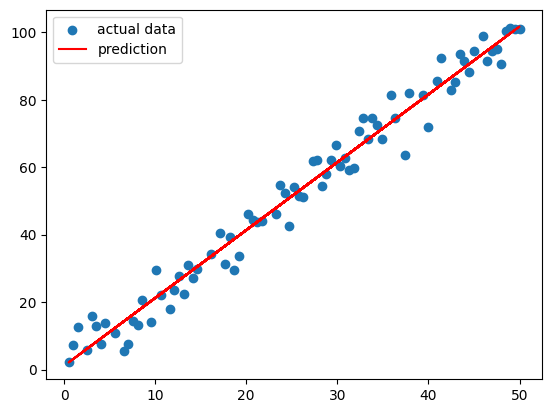

In [451]:
print("train visual")
plt.scatter(X_train, Y_train, label="actual data")
plt.plot(X_train, Y_train_pred, color="red", label="prediction")
plt.legend()
plt.show()

test visual


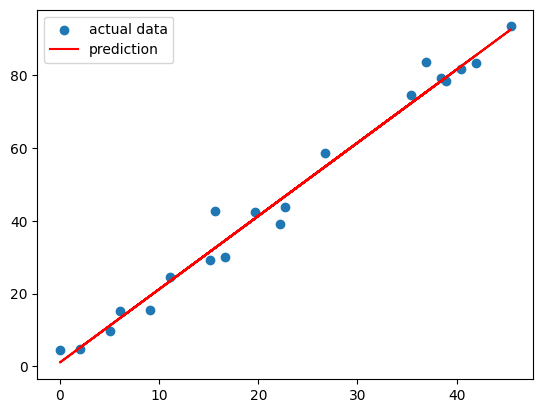

In [452]:
print("test visual")
plt.scatter(X_test, Y_test, label="actual data")
plt.plot(X_test, Y_test_pred, color="red", label="prediction")
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [453]:
a1 = 3
a2 = -1.5
c = 10
np.random.seed(42)
x1 = np.linspace(0, 50, 100)
x2 = np.linspace(0, 50, 100)
y = a1 * x1 + a2 * x2 + c
noise = np.random.normal(0, 5, size=len(x1))
Y = y + noise


In [454]:
X = np.column_stack((x1, x2))

In [455]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [456]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [457]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [458]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [11.02327767 11.02327767]
Intercept: 47.855625470893415


In [459]:
print("train")
print("MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("MSE:", mean_squared_error(Y_train, Y_train_pred))
print("R2:", r2_score(Y_train, Y_train_pred))
print("test")
print("MAE:", mean_absolute_error(Y_test, Y_test_pred))
print("MSE:", mean_squared_error(Y_test, Y_test_pred))
print("R2:", r2_score(Y_test, Y_test_pred))

train
MAE: 7.907532355806742
MSE: 97.9231651332213
R2: 0.8071001514037353
test
MAE: 7.1166081454493595
MSE: 71.72819717380831
R2: 0.8539978041454672


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [460]:
np.random.seed(42)
X = np.linspace(-10, 10, 200).reshape(-1, 1)
noise = np.random.normal(0, 10, size=X.shape)
y = 3*(X**2) + 2*X + 5 + noise


In [461]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [462]:
X_train, X_test, Y_train, Y_test = train_test_split(X_poly,y,test_size=0.2,random_state=42)


In [463]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [464]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [465]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [[0.         2.08431768 3.00312159]]
Intercept: [4.26242937]


In [466]:
print("train")
print("MAE:", mean_absolute_error(Y_train, y_train_pred))
print("MSE:", mean_squared_error(Y_train,y_train_pred))
print("R2:", r2_score(Y_train, y_train_pred))
print("test")
print("MAE:", mean_absolute_error(Y_test, y_test_pred))
print("MSE:", mean_squared_error(Y_test, y_test_pred))
print("R2:", r2_score(Y_test, y_test_pred))

train
MAE: 7.373156935139088
MSE: 88.04748215200638
R2: 0.990119528747085
test
MAE: 7.343105456060528
MSE: 77.48098766183145
R2: 0.9863632187482038


The polynomial regression model achieved extremely high performance with R² scores close to 1 on both training and testing data. The very small difference between train and test results indicates that the model generalizes very well and does not suffer from overfitting or underfitting.


## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [467]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'airlines-flights-data' dataset.
Path to dataset files: /kaggle/input/airlines-flights-data


In [468]:
os.listdir(path)

['airlines_flights_data.csv']

In [469]:
full_path = os.path.join(path,os.listdir(path)[0])

In [470]:
import pandas as pd
df = pd.read_csv(full_path)

In [471]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [473]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [474]:
df.isnull().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [475]:
df.duplicated().sum()

np.int64(0)

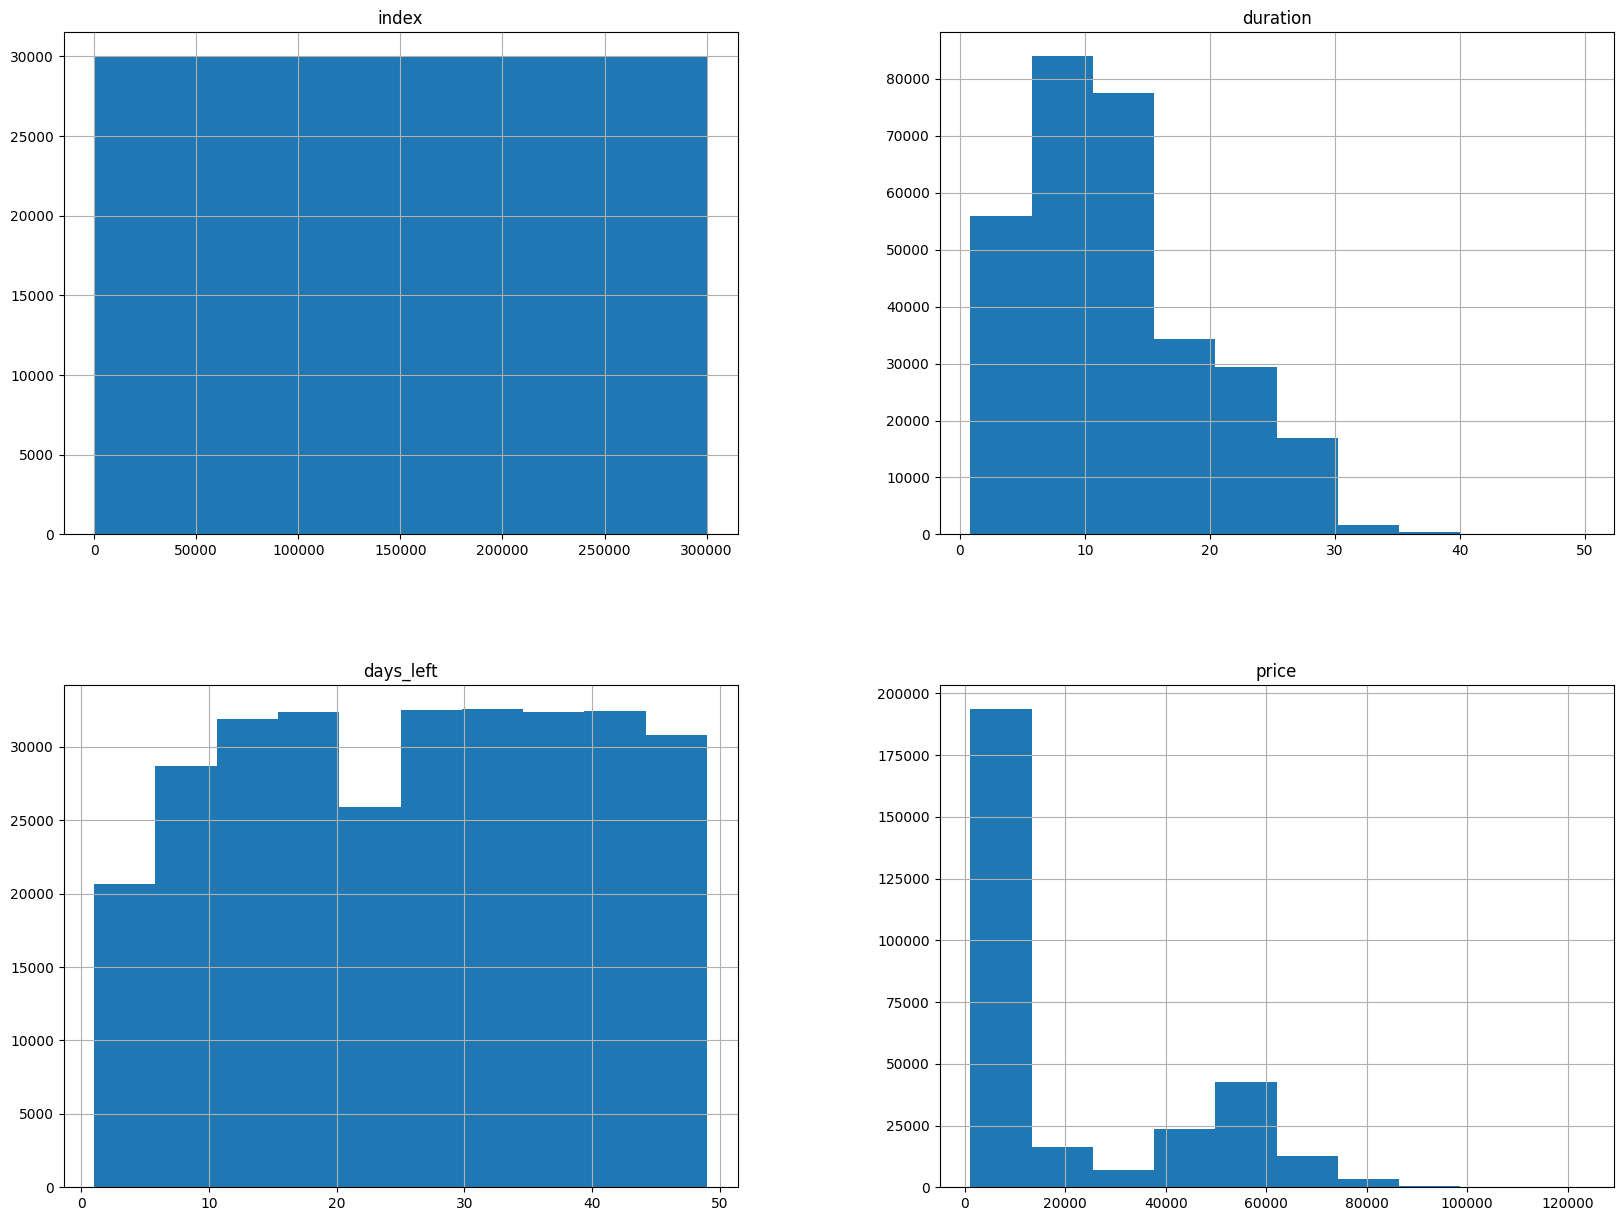

In [476]:
df.hist(figsize=(20,15))
plt.show()

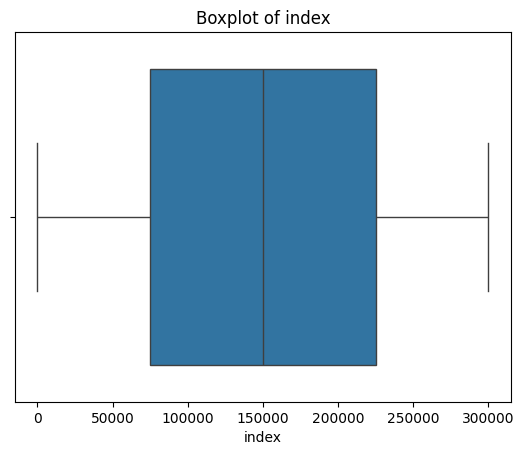

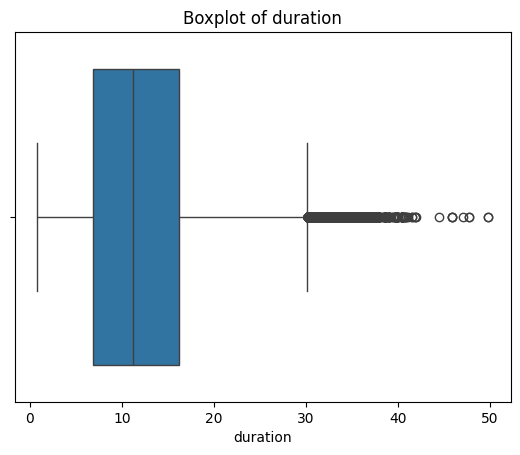

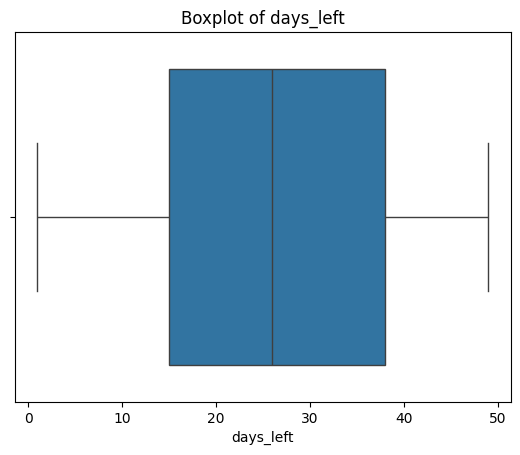

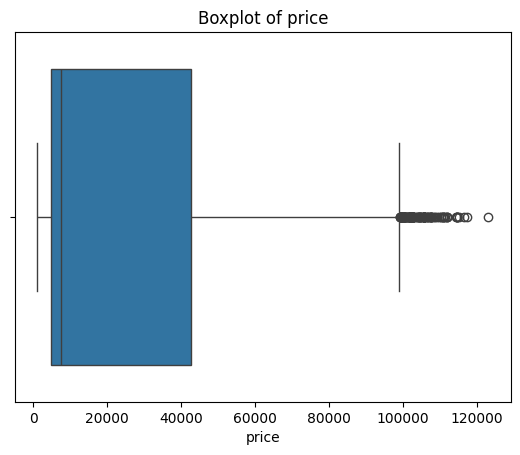

In [477]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

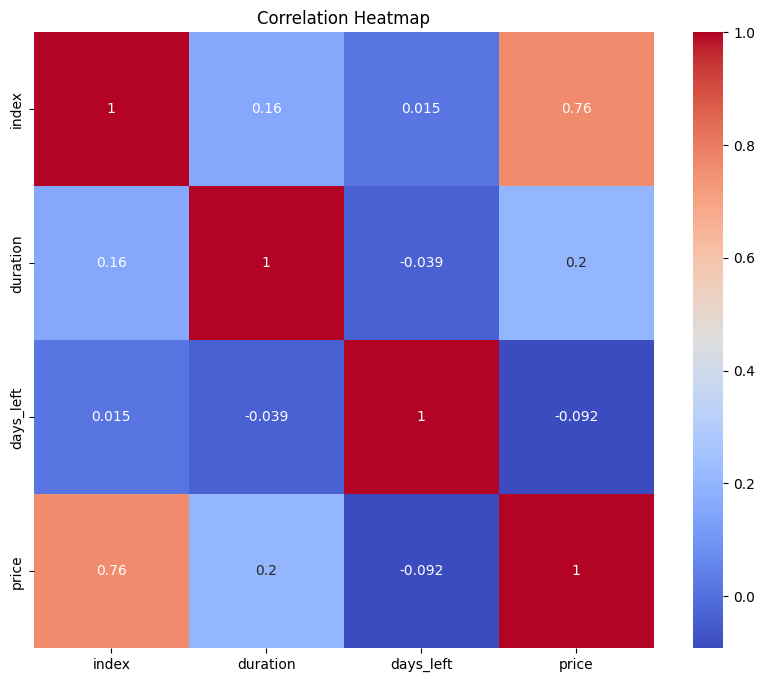

In [478]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


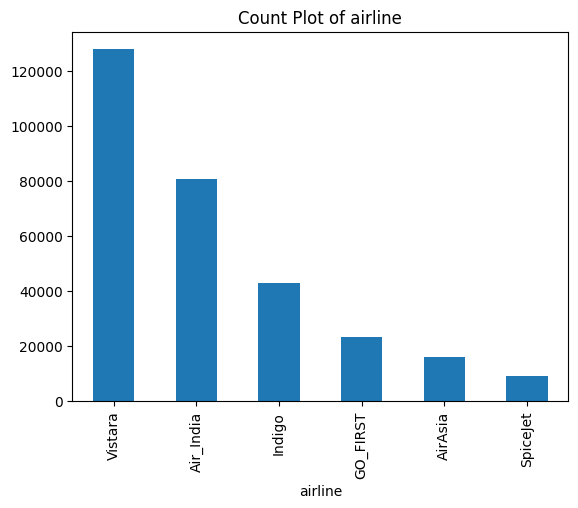

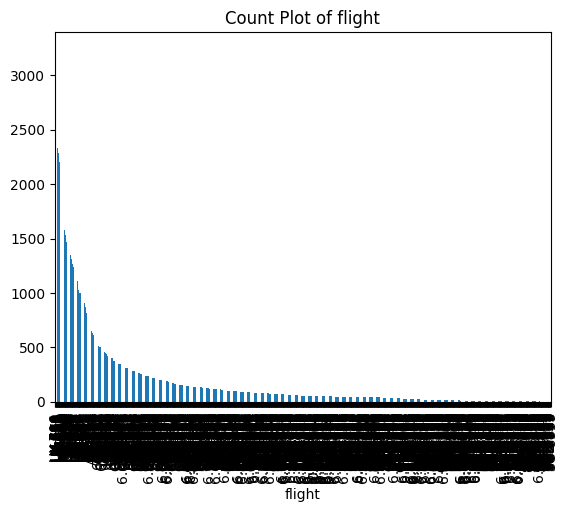

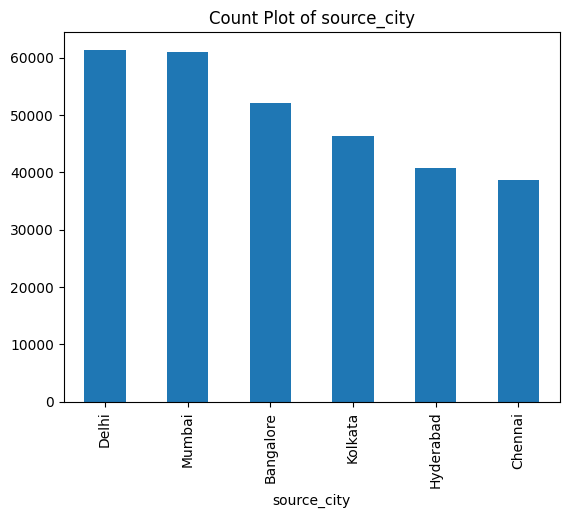

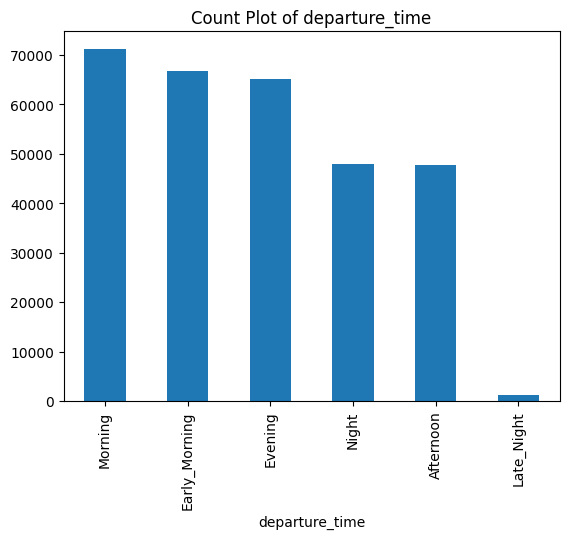

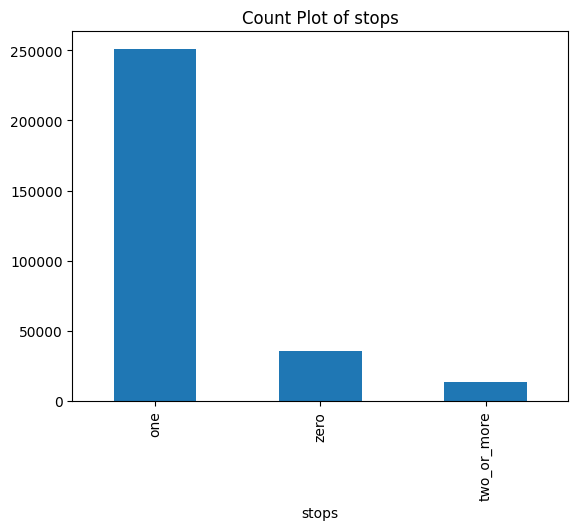

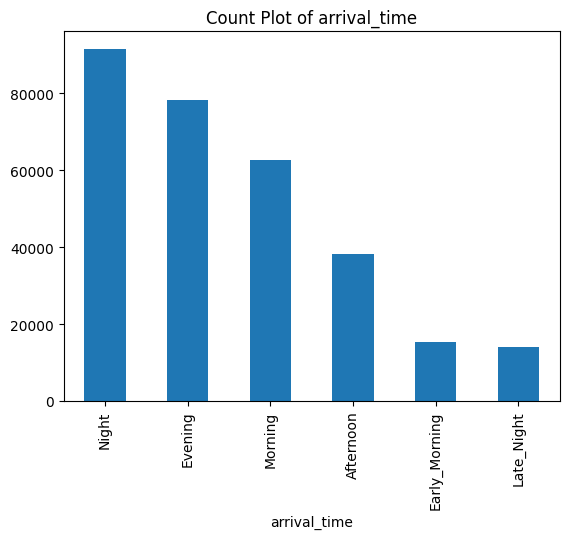

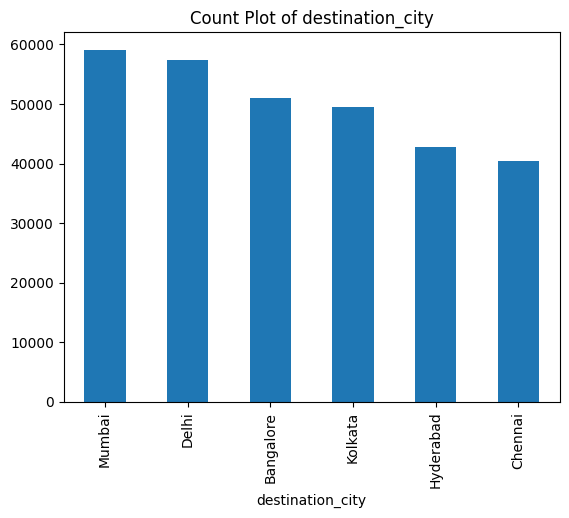

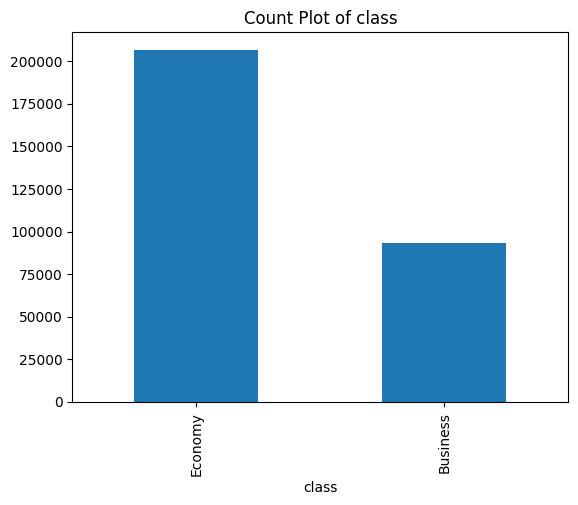

In [479]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Count Plot of {col}")
    plt.show()


In [480]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["price"] >= lower) & (df["price"] <= upper)]


In [481]:
Q1 = df["duration"].quantile(0.25)
Q3 = df["duration"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["duration"] >= lower) & (df["duration"] <= upper)]


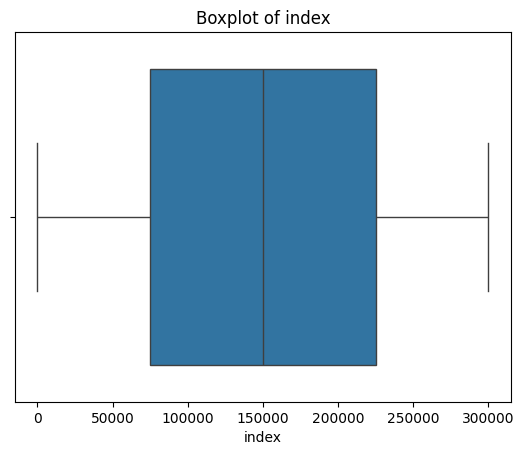

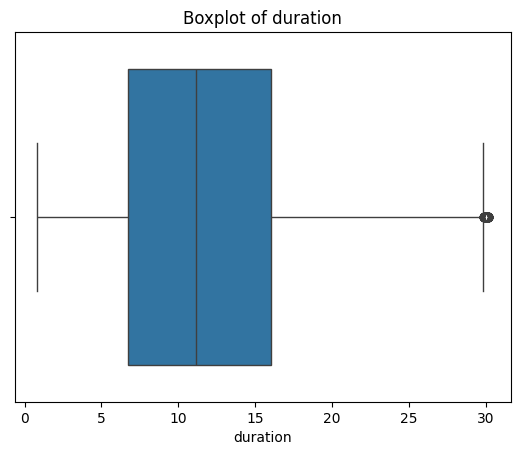

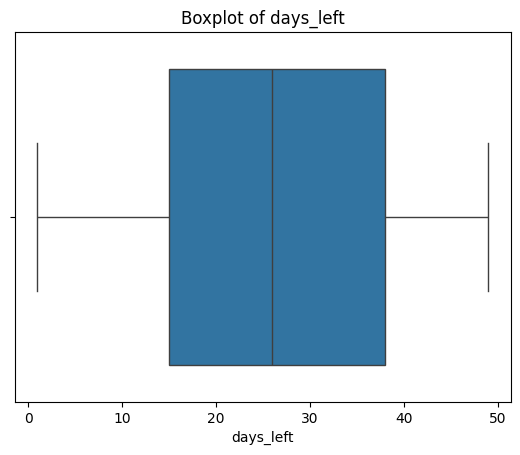

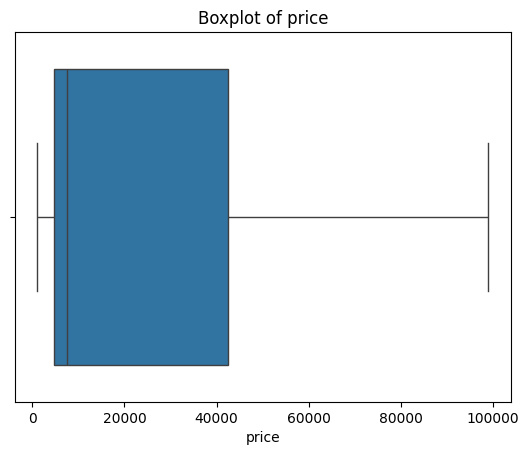

In [482]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [483]:
df = df.drop(columns=['index', 'flight'])


In [484]:
print(df['departure_time'].head(10))
print(df['arrival_time'].head(10))

0          Evening
1    Early_Morning
2    Early_Morning
3          Morning
4          Morning
5          Morning
6          Morning
7        Afternoon
8    Early_Morning
9        Afternoon
Name: departure_time, dtype: object
0            Night
1          Morning
2    Early_Morning
3        Afternoon
4          Morning
5        Afternoon
6          Morning
7          Evening
8          Morning
9          Evening
Name: arrival_time, dtype: object


In [485]:
df['arrival_time'].value_counts()

,count
arrival_time,
Night,90702
Evening,77217
Morning,62708
Afternoon,37938
Early_Morning,15367
Late_Night,13988


In [486]:
from sklearn.preprocessing import LabelEncoder

# ترتيب منطقي للفترات
ordered_times = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night","Late_Night"]

le = LabelEncoder()
le.fit(ordered_times)  # اعرف الترتيب

df['departure_time_encoded'] = le.transform(df['departure_time'])
df['arrival_time_encoded'] = le.transform(df['arrival_time'])

print(df[['departure_time', 'departure_time_encoded']].head(10))

  departure_time  departure_time_encoded
0        Evening                       2
1  Early_Morning                       1
2  Early_Morning                       1
3        Morning                       4
4        Morning                       4
5        Morning                       4
6        Morning                       4
7      Afternoon                       0
8  Early_Morning                       1
9      Afternoon                       0


In [487]:
from sklearn.preprocessing import LabelEncoder
ordinal_cols = ['stops', 'class']
encoders = {}

for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
print(df[ordinal_cols].head())


   stops  class
0      2      1
1      2      1
2      2      1
3      2      1
4      2      1


In [488]:
onehot_cols = ['airline', 'source_city', 'destination_city']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [489]:
df.isna().sum()

,0
departure_time,0
stops,0
arrival_time,0
class,0
duration,0
days_left,0
price,0
departure_time_encoded,0
arrival_time_encoded,0
airline_Air_India,0


In [490]:
df = df.drop(['departure_time', 'arrival_time'], axis=1)

In [491]:
df.isna().sum()

,0
stops,0
class,0
duration,0
days_left,0
price,0
departure_time_encoded,0
arrival_time_encoded,0
airline_Air_India,0
airline_GO_FIRST,0
airline_Indigo,0


In [492]:
X = df.drop('price', axis=1)
y = df['price']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [493]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [494]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [495]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [-3.27237626e+03 -4.45336398e+04  6.50866811e+01 -1.30270587e+02
  4.05502105e+01  1.87222518e+02 -3.41812198e+02  1.04435134e+03
  1.41869591e+03  1.25988505e+03  3.71523059e+03 -1.05576098e+02
 -1.61530849e+03 -1.84449678e+03  1.54576854e+03 -3.15514299e+02
 -1.38813593e+02 -1.72329424e+03 -1.78656422e+03  1.49268236e+03
 -1.82038867e+02]
Intercept: 53356.32657777057


In [496]:
print("train")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train,y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))
print("test")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

train
MAE: 4587.289843584251
MSE: 46221413.31004177
R2: 0.9100244865571436
test
MAE: 4604.192954159635
MSE: 46654216.22771365
R2: 0.9094568350947511


In [498]:
print(df['price'].mean())

20882.941276181526


In [497]:
import joblib

joblib.dump(model, "linear_regression_model.pkl")

['linear_regression_model.pkl']

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
